In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')
%matplotlib inline

In [2]:
# model参数设定
weights_init_std = 1
adj_signal = False

# 画图参数设定
num_row = 3
num_col = 3
dims = [4096] * (num_row * num_col + 1)

In [3]:
def adjust_tanh(dim, signal):
    return np.sqrt(dim) if signal else 1
def adjust_relu(dim, signal):
    return np.sqrt(2/dim) if signal else 1

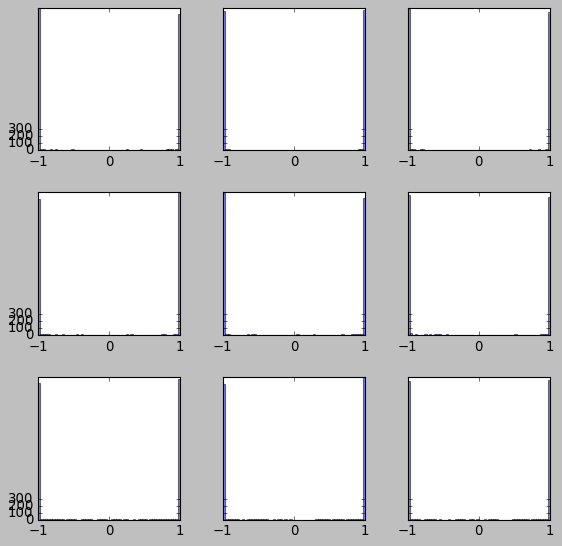

In [4]:
# tanh的结果
x = np.random.randn(16, dims[0])
hs_tanh = []
for Din, Dout in zip(dims[:-1], dims[1:]):
    w = weights_init_std * np.random.randn(Din, Dout) / adjust_tanh(Din, adj_signal)
    x = np.tanh(x.dot(w))
    hs_tanh.append(x)

fig_tanh, ax_tanh = plt.subplots(num_row, num_col, sharex=False, 
                                 sharey=True, figsize=(8, 8))

fig_tanh.subplots_adjust(hspace=0.3, wspace=0.3,
                         left=0.1, right=0.9,
                         bottom=0.1, top=0.9)

for i in range(num_row):
    for j in range(num_col):
        ax_tanh[i, j].hist(hs_tanh[num_row*i+j][0], bins=60, alpha=0.5)
        ax_tanh[i, j].set(xticks=[-1, 0, 1], yticks=[0, 100, 200, 300])

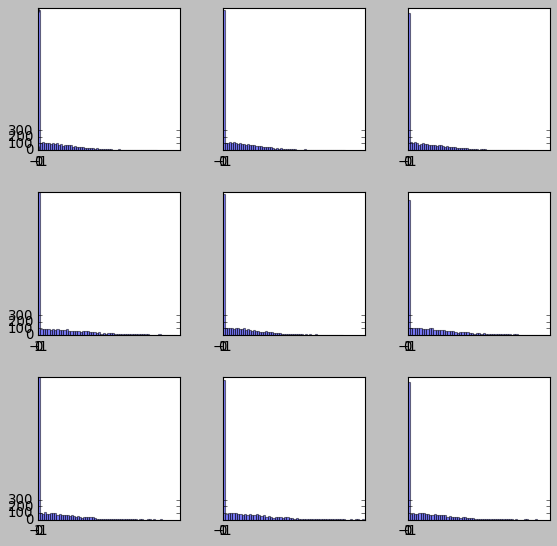

In [5]:
# ReLU的结果：0值最多
y = np.random.randn(16, dims[0])
hs_relu = []
for Din, Dout in zip(dims[:-1], dims[1:]):
    w = weights_init_std * np.random.randn(Din, Dout) / adjust_relu(Din, adj_signal)
    y = np.maximum(0, y.dot(w))
    hs_relu.append(y)

fig_relu, ax_relu = plt.subplots(num_row, num_col, sharex=False, 
                                 sharey=True, figsize=(8, 8))

fig_relu.subplots_adjust(hspace=0.3, wspace=0.3,
                         left=0.1, right=0.9,
                         bottom=0.1, top=0.9)

for i in range(num_row):
    for j in range(num_col):
        ax_relu[i, j].hist(hs_relu[num_row*i+j][0], bins=60, alpha=0.5)
        ax_relu[i, j].set(xticks=[-1, 0, 1], yticks=[0, 100, 200, 300])

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

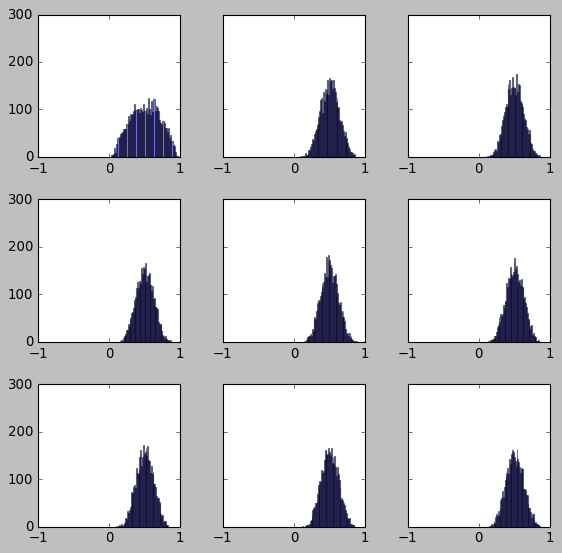

In [7]:
# sigmoid的结果
z = np.random.randn(16, dims[0])
hs_sig = []
for Din, Dout in zip(dims[:-1], dims[1:]):
    w = weights_init_std * np.random.randn(Din, Dout) / adjust_tanh(Din, signal=True)
    z = sigmoid(z.dot(w))
    hs_sig.append(z)

fig_sig, ax_sig = plt.subplots(num_row, num_col, sharex=False, sharey=True, 
                               figsize=(8, 8))

fig_sig.subplots_adjust(hspace=0.3, wspace=0.3,
                         left=0.1, right=0.9,
                         bottom=0.1, top=0.9)

for i in range(num_row):
    for j in range(num_col):
        ax_sig[i, j].hist(hs_sig[num_row*i+j][0], bins=60, alpha=0.5)
        ax_sig[i, j].set(xticks=[-1, 0, 1], yticks=[0, 100, 200, 300])